In [134]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
from sklearn import linear_model


Atrain= pd.read_csv("train.csv")
Btest= pd.read_csv("test.csv")
print ("train data shape :", Atrain.shape)
print ("test data shape :", Btest.shape)

train data shape : (200000, 202)
test data shape : (200000, 201)


In [136]:
Atrain.head(5)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [137]:
Btest.head(5)

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [138]:
Atrain.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [139]:
Btest.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


In [140]:
# putting all the colname in a list
colnames = list(Atrain.columns)

# excluding target and index columns
variables = colnames[2:]
n = 10
chunks = [variables[x:x + n] for x in range(0, len(variables), n)]

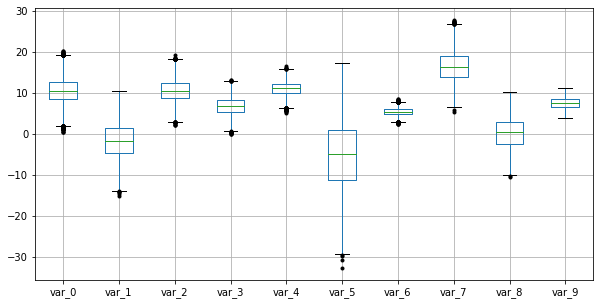

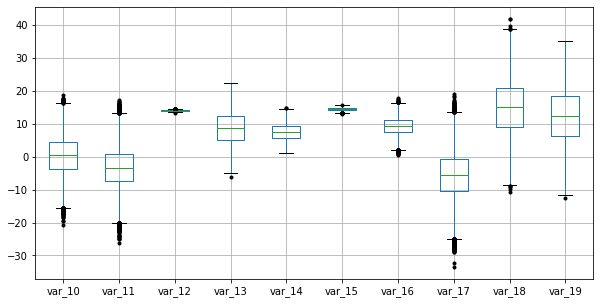

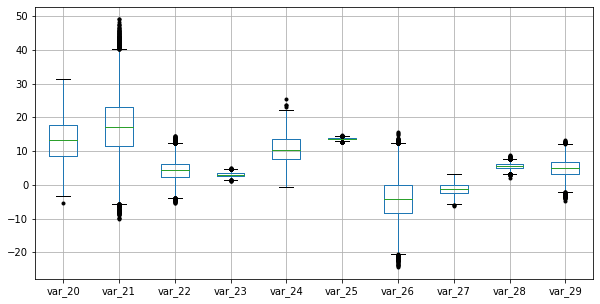

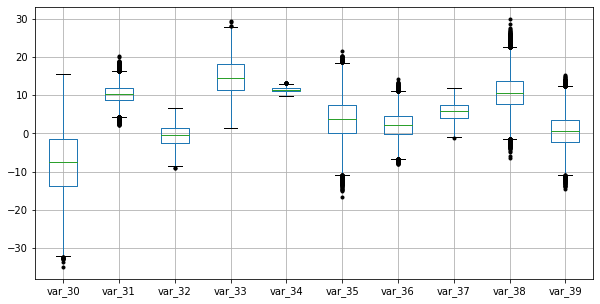

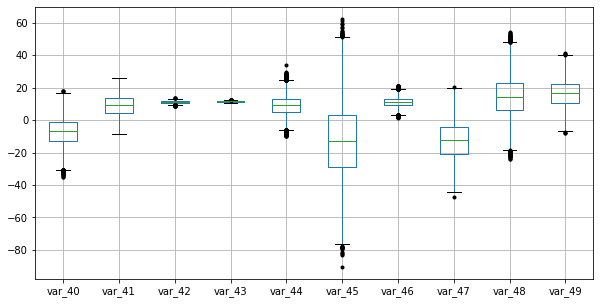

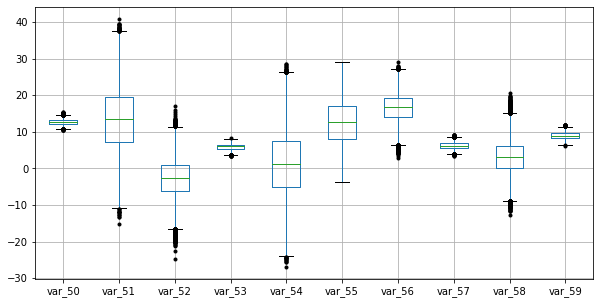

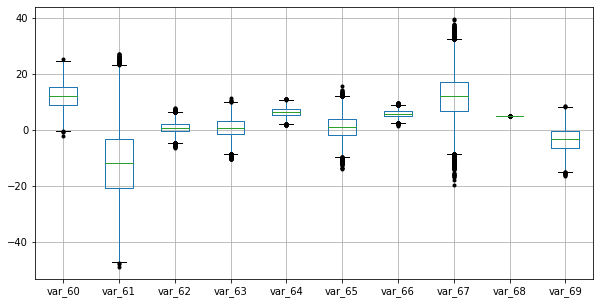

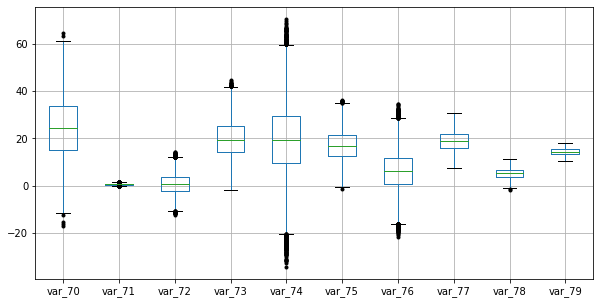

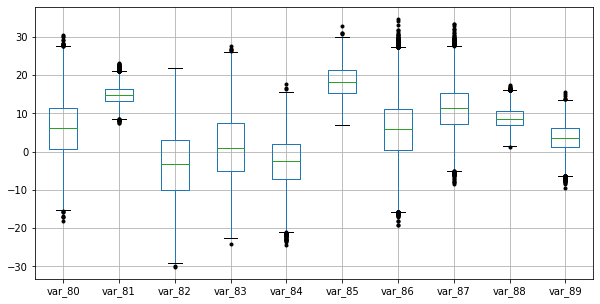

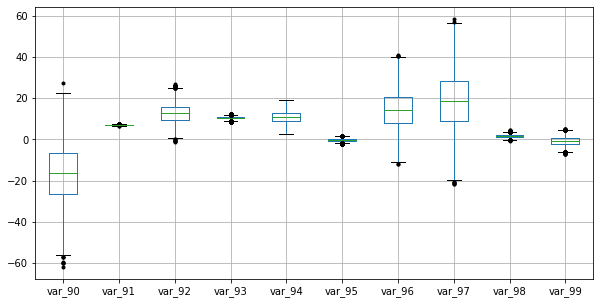

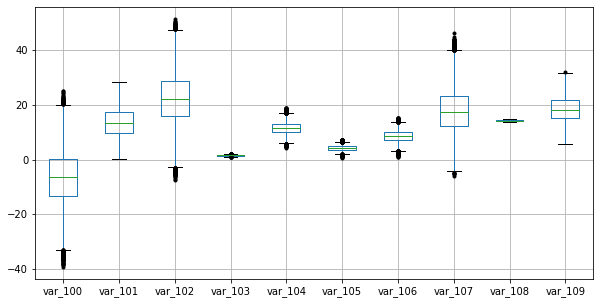

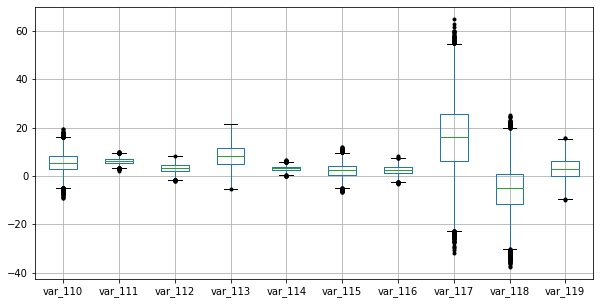

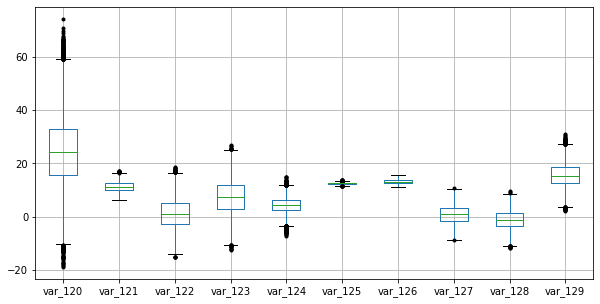

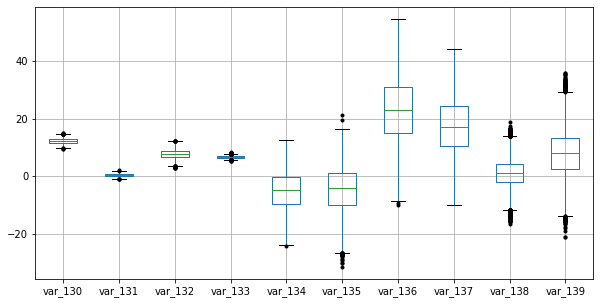

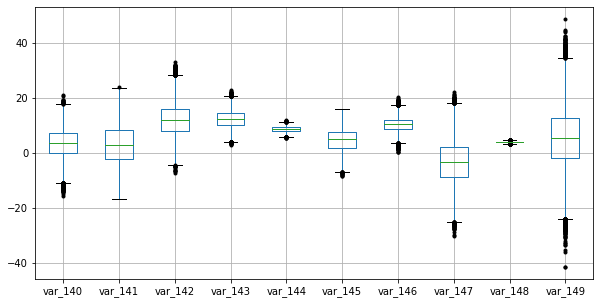

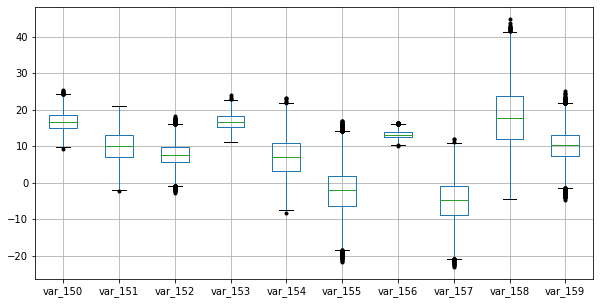

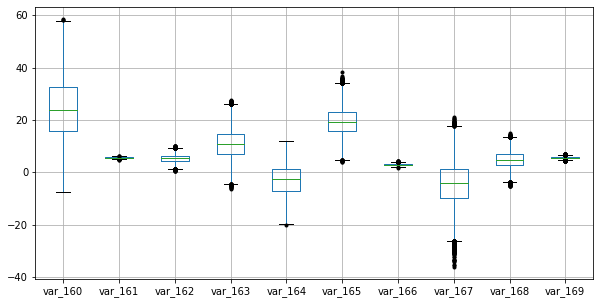

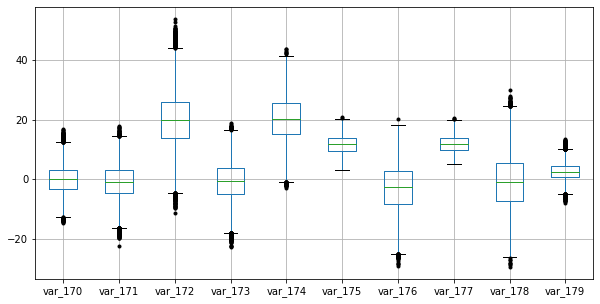

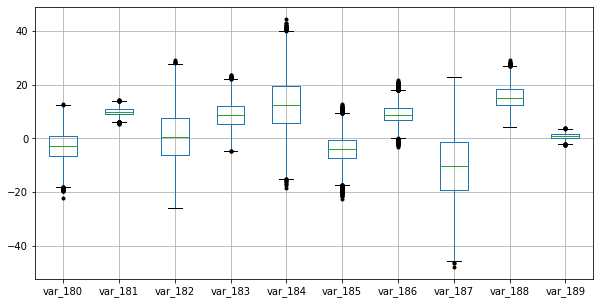

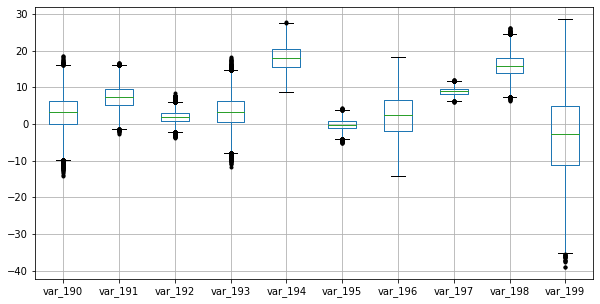

In [141]:
#displaying a boxplot
for i in chunks:
    plt.show(Atrain.boxplot(column = i, sym='k.', figsize=(10,5)))

In [142]:
# Finding null values:
if True in list(Atrain.isnull().any()):
    print('There are some null values here!\nVar_Name; number_of_nulls:')
    print(Atrain[Atrain.columns[Atrain.isnull().any()]].isnull().sum())
else:
    print('No null values in your Dataset!')

No null values in your Dataset!


In [143]:
# Finding null values:
if True in list(Btest.isnull().any()):
    print('There are some null values here!\nVar_Name; number_of_nulls:')
    print(Btest[Btest.columns[Btest.isnull().any()]].isnull().sum())
else:
    print('No null values in your Dataset!')

No null values in your Dataset!


Distributions of first 28 columns


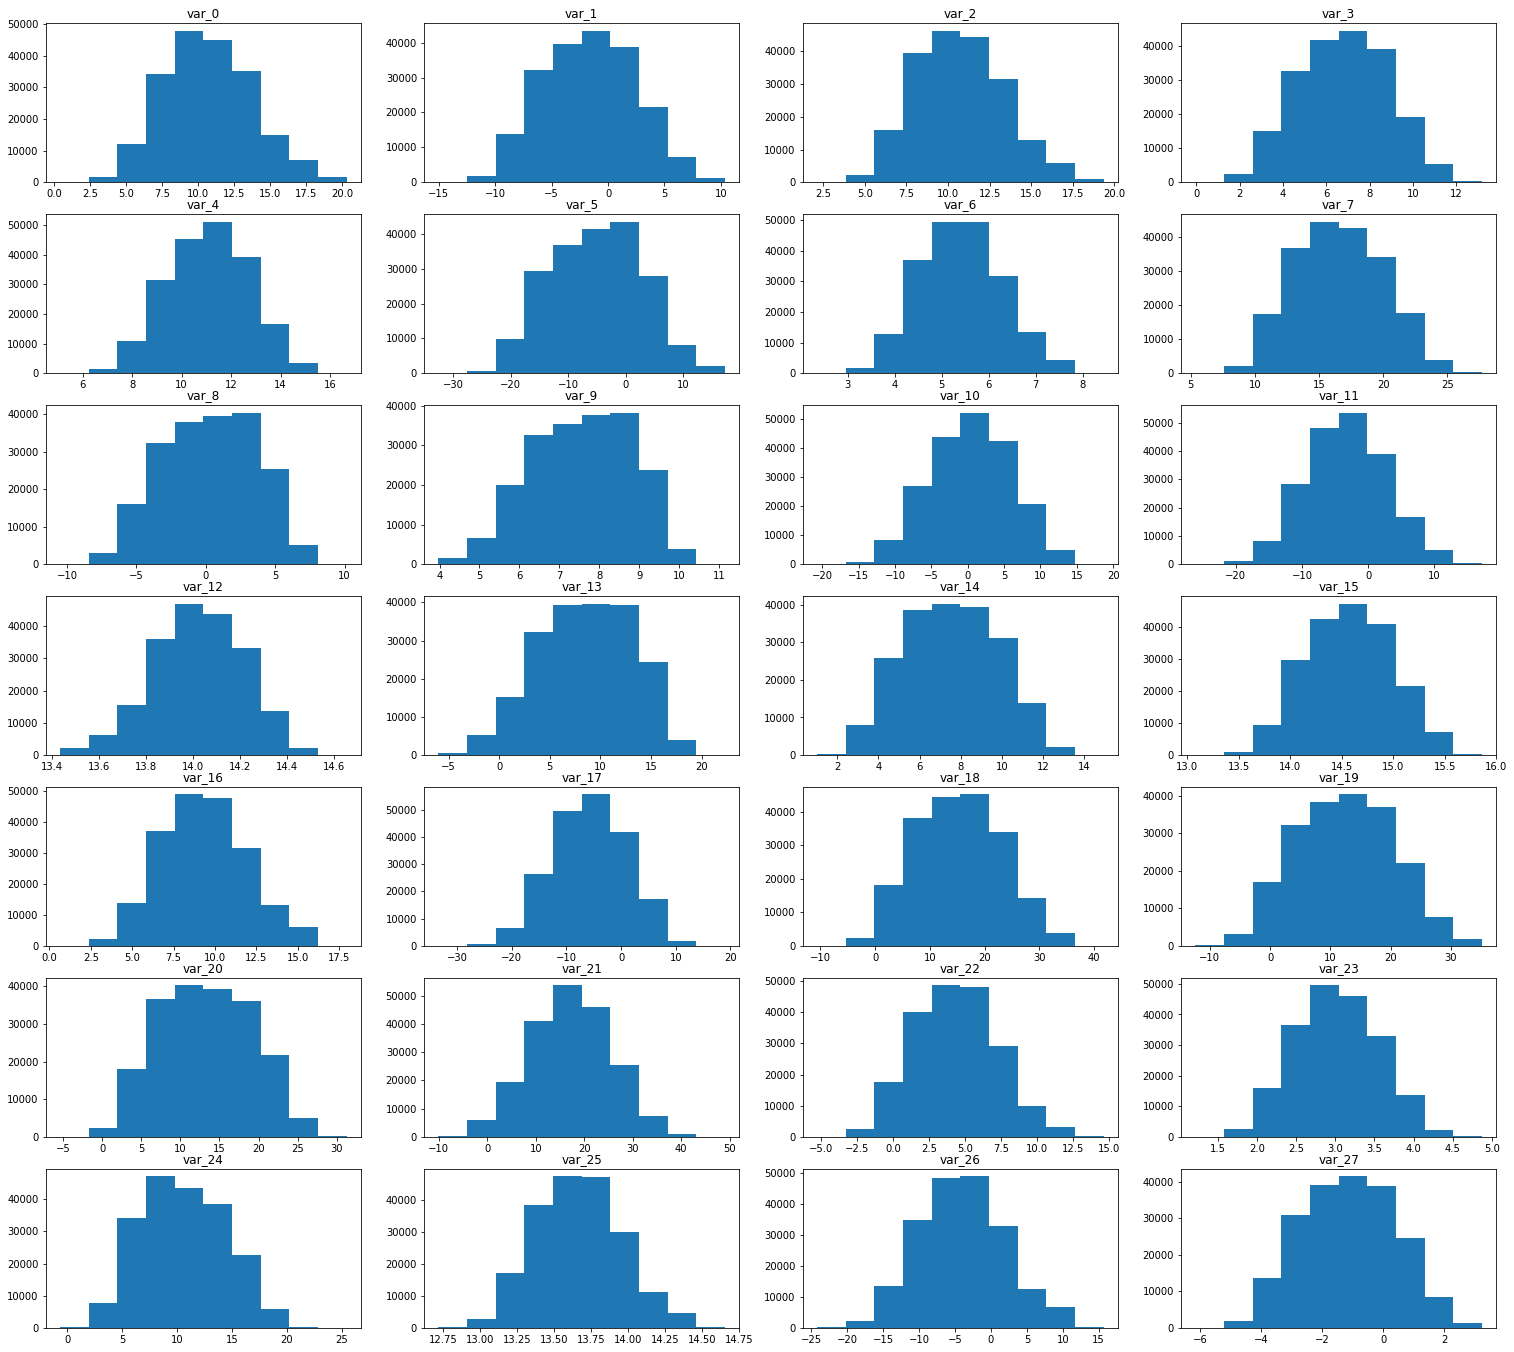

In [144]:
print('Distributions of first 28 columns')
plt.figure(figsize=(26, 24))
for i, col in enumerate(list(Atrain.columns)[2:30]):
    plt.subplot(7, 4, i + 1)
    plt.hist(Atrain[col])
    plt.title(col)

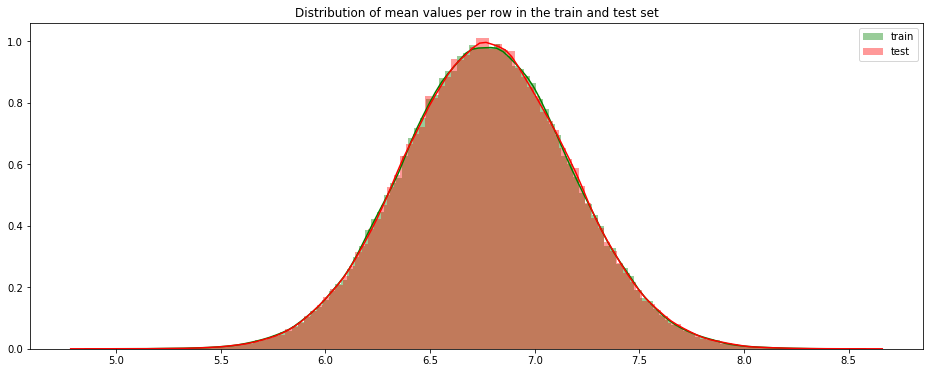

In [145]:
plt.figure(figsize=(16,6))
features = Atrain.columns.values[2:202]
plt.title("Distribution of mean values per row in the train and test set")
sns.distplot(Atrain[features].mean(axis=1),color="green", kde=True,bins=120, label='train')
sns.distplot(Btest[features].mean(axis=1),color="red", kde=True,bins=120, label='test')
plt.legend()
plt.show()

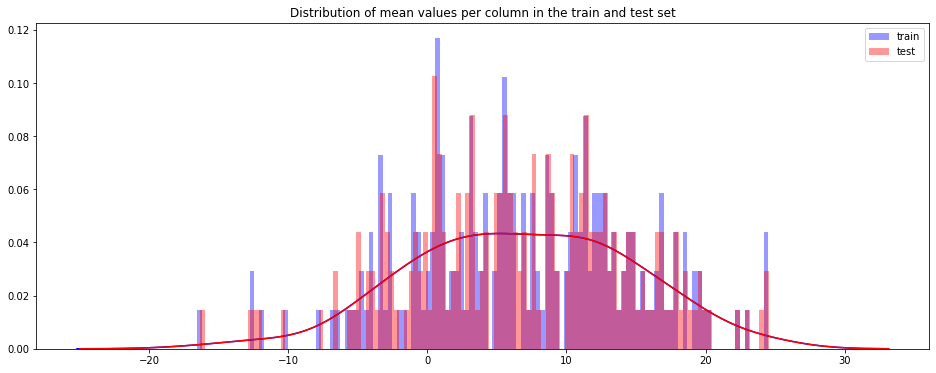

In [146]:
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per column in the train and test set")
sns.distplot(Atrain[features].mean(axis=0),color="blue",kde=True,bins=120, label='train')
sns.distplot(Btest[features].mean(axis=0),color="red", kde=True,bins=120, label='test')
plt.legend()
plt.show()

In [147]:
Atrain['target'].value_counts(normalize=True)

0    0.89951
1    0.10049
Name: target, dtype: float64

In [148]:
corrs = Atrain.corr().abs().unstack().sort_values(kind="quicksort").reset_index()
corrs = corrs[corrs['level_0'] != corrs['level_1']]
corrs.tail(30)

,level_0,level_1,0
40170,target,var_80,0.057609
40171,var_80,target,0.057609
40172,var_166,target,0.057773
40173,target,var_166,0.057773
40174,var_99,target,0.058367
40175,target,var_99,0.058367
40176,target,var_21,0.058483
40177,var_21,target,0.058483
40178,target,var_22,0.060558
40179,var_22,target,0.060558


In [149]:
corrs.head()

,level_0,level_1,0
0,var_191,var_75,2.703975e-08
1,var_75,var_191,2.703975e-08
2,var_173,var_6,5.942735e-08
3,var_6,var_173,5.942735e-08
4,var_126,var_109,1.313947e-07


There are no high correlation between any feature with target. Hence, we don't have to drop any feature.

In [150]:
idx = features = Atrain.columns.values[2:202]
for f in [Btest, Atrain]:
    f['sum'] = f[idx].sum(axis=1)  
    f['min'] = f[idx].min(axis=1)
    f['max'] = f[idx].max(axis=1)
    f['mean'] = f[idx].mean(axis=1)
    f['std'] = f[idx].std(axis=1)
    f['skew'] = f[idx].skew(axis=1)
    f['kurt'] = f[idx].kurtosis(axis=1)
    f['med'] = f[idx].median(axis=1)

In [151]:
Atrain[Atrain.columns[202:]].head()

,sum,min,max,mean,std,skew,kurt,med
0,1456.3182,-21.4494,43.1127,7.281591,9.331540,0.101580,1.331023,6.77040
1,1415.3636,-47.3797,40.5632,7.076818,10.336130,-0.351734,4.110215,7.22315
2,1240.8966,-22.4038,33.8820,6.204483,8.753387,-0.056957,0.546438,5.89940
3,1288.2319,-35.1659,38.1015,6.441159,9.594064,-0.480116,2.630499,6.70260
4,1354.2310,-65.4863,41.1037,6.771155,11.287122,-1.463426,9.787399,6.94735


In [152]:
Btest[Btest.columns[201:]].head()

,sum,min,max,mean,std,skew,kurt,med
0,1416.6404,-31.9891,42.0248,7.083202,9.910632,-0.088518,1.871262,7.31440
1,1249.6860,-41.1924,35.6020,6.248430,9.541267,-0.559785,3.391068,6.43960
2,1430.2599,-34.3488,39.3654,7.151299,9.967466,-0.135084,2.326901,7.26355
3,1411.4447,-21.4797,40.3383,7.057223,8.257204,-0.167741,2.253054,6.89675
4,1423.7364,-24.8254,45.5510,7.118682,10.043542,0.293484,2.044943,6.83375


In [153]:
features = [c for c in Atrain.columns if c not in ['ID_code', 'target']]

In [154]:
cols=["target","ID_code"]
x = Atrain.drop(cols,axis=1)
y = Atrain["target"]
x_test = Btest.drop("ID_code",axis=1)

In [155]:
x_train, val_x, y_train, val_y = train_test_split(x, y, random_state=1)
rfc_model = RandomForestClassifier(random_state=0).fit(x_train, y_train)

/home/priyanka/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [156]:
y_pred_rfc = rfc_model.predict(x_test)
y_pred_rfc

array([0, 0, 0, ..., 0, 0, 0])

In [157]:
x_train, val_x, y_train, val_y = train_test_split(x, y, random_state=1)
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5).fit(x_train, y_train)

In [158]:
y_pred_tree = tree_model.predict(x_test)

In [159]:
lgb_params = {'bagging_freq': 5,
    'bagging_fraction': 0.4,
    'boost_from_average':'false',
    'boost': 'gbdt',
    'feature_fraction': 0.05,
    'learning_rate': 0.01,
    'max_depth': -1,  
    'metric':'auc',
    'min_data_in_leaf': 80,
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves': 13,
    'num_threads': 8,
    'tree_learner': 'serial',
    'objective': 'binary', 
    'verbosity': 1
             }

In [160]:
folds = StratifiedKFold(n_splits=15, shuffle=False, random_state=2000)
oof = np.zeros(len(Atrain))
y_pred = np.zeros(len(Btest))
important_feature = pd.DataFrame()
for fold_n, (train_index, valid_index) in enumerate(folds.split(Atrain.values,y.values)):
    print('Fold'.format(fold_n))
    train_data = lgb.Dataset(Atrain.iloc[train_index][features], label=y.iloc[train_index])
    valid_data = lgb.Dataset(Atrain.iloc[valid_index][features], label=y.iloc[valid_index])
    num_round = 1000000

    clf = lgb.train(lgb_params, train_data, num_round, valid_sets = [train_data, valid_data], verbose_eval=1000, early_stopping_rounds = 3000)
    oof[valid_index] = clf.predict(Atrain.iloc[valid_index][features], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_n + 1
    feature_importance_df = pd.concat([important_feature, fold_importance_df], axis=0)
    
    y_pred += clf.predict(Btest[features], num_iteration=clf.best_iteration) / folds.n_splits

print("CV score: {:<8.5f}".format(roc_auc_score(y, oof)))


Fold
Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.899528	valid_1's auc: 0.882606
[2000]	training's auc: 0.91054	valid_1's auc: 0.890281
[3000]	training's auc: 0.918077	valid_1's auc: 0.894579
[4000]	training's auc: 0.923891	valid_1's auc: 0.897478
[5000]	training's auc: 0.928728	valid_1's auc: 0.89934
[6000]	training's auc: 0.933019	valid_1's auc: 0.900379
[7000]	training's auc: 0.936905	valid_1's auc: 0.901311
[8000]	training's auc: 0.940544	valid_1's auc: 0.901752
[9000]	training's auc: 0.943995	valid_1's auc: 0.902149
[10000]	training's auc: 0.947327	valid_1's auc: 0.902387
[11000]	training's auc: 0.950502	valid_1's auc: 0.902599
[12000]	training's auc: 0.953533	valid_1's auc: 0.902609
[13000]	training's auc: 0.956455	valid_1's auc: 0.902506
[14000]	training's auc: 0.959283	valid_1's auc: 0.90236
Early stopping, best iteration is:
[11851]	training's auc: 0.953092	valid_1's auc: 0.90272
Fold
Training until validation scores don't improve fo

[9000]	training's auc: 0.943908	valid_1's auc: 0.901984
[10000]	training's auc: 0.947295	valid_1's auc: 0.901838
[11000]	training's auc: 0.950476	valid_1's auc: 0.901799
[12000]	training's auc: 0.953544	valid_1's auc: 0.901443
Early stopping, best iteration is:
[9027]	training's auc: 0.943997	valid_1's auc: 0.902026
Fold
Training until validation scores don't improve for 3000 rounds.
[1000]	training's auc: 0.89984	valid_1's auc: 0.877705
[2000]	training's auc: 0.910589	valid_1's auc: 0.886492
[3000]	training's auc: 0.918199	valid_1's auc: 0.891313
[4000]	training's auc: 0.923978	valid_1's auc: 0.894276
[5000]	training's auc: 0.928804	valid_1's auc: 0.895798
[6000]	training's auc: 0.932943	valid_1's auc: 0.896366
[7000]	training's auc: 0.936869	valid_1's auc: 0.896901
[8000]	training's auc: 0.94049	valid_1's auc: 0.89714
[9000]	training's auc: 0.943914	valid_1's auc: 0.897363
[10000]	training's auc: 0.947298	valid_1's auc: 0.897627
[11000]	training's auc: 0.950402	valid_1's auc: 0.89749

In [161]:
submission_rfc = pd.DataFrame({
        "ID_code": Btest["ID_code"],
        "target": y_pred_rfc
    })
submission_rfc.to_csv('submission_rfc.csv', index=False)

In [162]:
submission_tree = pd.DataFrame({
        "ID_code": Btest["ID_code"],
        "target": y_pred_tree
    })
submission_tree.to_csv('submission_tree.csv', index=False)

In [163]:
submission_lgb = pd.DataFrame({"ID_code":Btest["ID_code"].values})
submission_lgb["target"] = y_pred
submission_lgb.to_csv("submission_lgb.csv", index=False)